# An Outline for the Tasks Ahead..

Before we begin solving any business problem that requires modelling of data, it is paramount that we complete the below checklist items (as part of a standard process regardless of the problem statement or/and domain):

- [ ] Business Requirements Gathering / Problem Identification (Background Information)
- [ ] Pre-requisites setup (Importing packages, etc.)
- [ ] Data source identification and access
- [ ] Exploratory Data Analysis
- [ ] Data Preparation
- [ ] Model Building & Evaluation
- [ ] Model Deployment

While the activities above are not exhaustive, they cover the core requirements of any data modelling exercise.

# Table of Contents: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>

<img src='' width="700" />

### Problem Description
>- The HR department of a reputed organization would like to use more proactive, data based methods to determine the most optimal team assignment. This is to ensure that each team has an optimal mix of employees who are likely to complete tasks, as well as employees who are unlikely to complete tasks. By using machine learning, the department hopes to be able to quickly (and dynamically) allocate & re-allocate employees to different projects to maximize the overall likelihood of project success.

### Key Stakeholders
>- Department / Vertical Heads - In a consulting organization, this solution would be helpful for department heads (e.g CPG, Retail, Telco, Industrials, etc.) so that they may plan their teams and team assignments

>- HR Business Partners - HRBPs would be able to use this solution to plan / advise managers on how to plan their respective teams.

>- Project Managers - Project managers can use this solution before onboarding a new employee into their team, to ensure that he / she fits within the "optimal mix" of employees who are / aren't completing their tasks.

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

##### Libraries Import:
>- Pandas for data processing and transformation. Numpy for numerical functions
>- Seaborn, Matplotlib and Ploty for visual representations of data / function outputs
>- (Sklearn) Train_Test_Split to split our data into randomized train and test dataframes.
>- (Sklearn) LogisticRegression to implement a logistic regression model
>- (Sklearn) NearestNeighbors, KNeighborsClassifier to implement a KNN classification model
>- (Sklearn) Metrics to measure classification performance
>- Pickle to serialize our model object so that it can be used in Streamlit
>- Streamlit to deploy a GUI which can be used to interact with the model

##### Custom Functions:
>- Class_Perf_Measures - a function that takes the model object, X_test (which contains the test data predictor variables), Y_test (which contains the test data target variable) to calculate and display performance measures such as recall, precision, and confusion matrix metrics.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

# Graphics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics

# Model Deployment
import pickle
import streamlit as st


# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "F1":F1,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Initial Cleanup - dupes, missing values](#missing-values)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

[Go to Top of Notebook](#table-of-content)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

We read in the dataset (provided in CSV format) and look at the last 5 rows just to get a high level understanding of the kind of variables we are working with.

In [2]:
# We read the dataset that was provided to us
df = pd.read_csv('SystemAdministrators.csv')
df.tail()

,task_completed,employee_experience,training_level4,training_level6,training_level8
70,0,5.60,1,0,0
71,0,5.90,0,0,1
72,0,6.40,0,1,0
73,0,3.80,1,0,0
74,0,5.30,1,0,0


**Task_Completed** is our target variable, while the rest are potential predictor variables. 1 indicates task completed, while 0 indicates task not completed

**employee_experience** is a predictor variable (NUMERIC), and indicates the years of experience the employee has

**Training_level4,6,8** are predictor variables, and seem to be one hot encoded (likely a categorical variable called training_level that had 4, 6, 8 as values)

As the data is already clean with no missing values, duplicates, and serious outliers, we can proceed directly to the train / test split.

> **Initial Cleanup - dupes, missing values** <a class="anchor" id="missing-values"></a>

In this step, we remove duplicates (if any) and treat missing values.

This step is not needed as the data is already confirmed to be free of duplicates and missing values.

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

In this step, we look at summary statistics and graphical distributions to understand if outliers exist.

This step is not needed as the data is already confirmed to be free of any serious outliers.

> **Feature Selection** <a class="anchor" id="feature-selection"></a>

We select the features that are to be used in our model.
In the case of this problem statement, we will use ALL of the provided variables.
<br>

>**Completed:**<br>
> 1. One hot encoding of categorical variables<br>
Note - we are not dropping any of the dummy variables as all dummies are needed for classification algorithms

>**To Do:**<br>
> 1. Split the data into train and test<br>

> **Data Partitioning** <a class="anchor" id="data-split"></a>

In this step we partition the data into "train" and "test" sets. We use the train_test_split function that splits the data into random train and test subsets.
<br>

> **To Do:**<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>


In [3]:
target = ['task_completed']

X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=1)

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>We first need to split the dataset so that we only normalize the numeric variables. Once normalized, we then recreate the dataset by combining the normalized numeric variables with the categorical (dummy) variables.

In [4]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

# Note - this is done only for numeric variables. Hence, we first separate categorical and numeric before we normalize.

X_train_dummy = X_train[["training_level4", "training_level6", "training_level8"]]
X_train = X_train[["employee_experience"]]

X_test_dummy = X_test[["training_level4", "training_level6", "training_level8"]]
X_test = X_test[["employee_experience"]]

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

X_train = pd.concat([X_train, X_train_dummy], axis=1)
X_test = pd.concat([X_test, X_test_dummy], axis=1)

We have normalized the numeric variable (employee experience). We first separate the dummy variables and numeric, applied the Z scaling technique to employee experience, and then concatenated the dummy and scaled employee experience together to create the final X_train and X_test dataframes.

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

We now begin to create our KNN and Logistic Models. 

For KNN, we first try various values of k (from 1 to 21, step of 2). We then choose a high level performance measure (in this case, accuracy) for comparison purposes. Then we choose the best value for k based on Accuracy (while ensuring this k value is not too high or too low, to avoid underfitting / overfitting).

For the Logistic Model, we simply pass the training data to the LogisticRegression model object.

For both models, we first observe the train and test accuracy to ensure that overfitting / underfitting is not present. Once this is complete, we calculate the AUC and choose the winning model as the one with the highest AUC.

Post this, we evaluate the performance of our winning model so that we can choose an ideal probability threshold. This step is to be completed in the context of the business problem (what is more expensive / risky for the business? false positives or false negatives?)

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [ ] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Steps to Complete:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy
>3. Ensure a k value that is not too low (leads to overfitting) and not too high (leads to underfitting)

In [5]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.87
1,3,0.91
2,5,0.87
3,7,0.91
4,9,0.91
5,11,0.91
6,13,0.87
7,15,0.91
8,17,0.91
9,19,0.91


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 7 as this is the lowest value of k that achieves the highest accuracy value (91%). Note that while k=3 also achieves this, I won't select it as I don't want a k value that is too low. Similarily I don't select a k value > 7 as I want to avoid a k value that is too high (to avoid overfitting and underfitting, respectively)<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [6]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))


Training data Accuracy: 0.9
Testing data Accuracy: 0.91


There does not seem to be evidence of overfitting or underfitting, as the accuracy of both train and test are very similar (90% vs. 91%)

>**Logistic Model:**<br>
>We produce the same table above but this time using a Logistic Model

In [7]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.

y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.92
Testing data Accuracy: 0.87


Slightly lower accuracy observed for the test dataset. There is no major evidence of overfitting or underfitting as the accuracy values of training and testing data are similar (92% vs. 87%)

>**Winning Model:**<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - We use AUC and will choose the model that gives us the highest value.

C:\Users\theda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


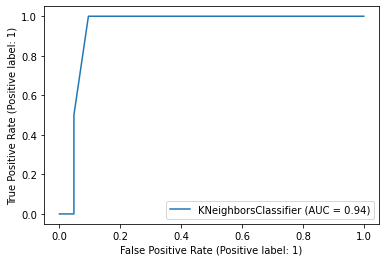

C:\Users\theda\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


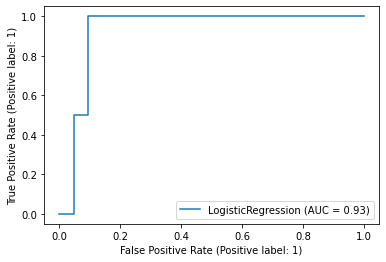

In [8]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<br>
AUC is slightly higher for KNN (0.94) vs. the Logistic Model (0.93). Hence I choose KNN as our winning model and will evaluate it's performance measures further to determine the ideal probability threshold.

In [9]:
class_perf_measures(knn,X_test,y_test)

#We use the custom function to generate all performance measures of interest.

C:\Users\theda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\theda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,2,0,21,0,0.09,1.00,0.16,0.09
1,0.10,2,17,4,0,0.33,1.00,0.50,0.83
2,0.20,2,17,4,0,0.33,1.00,0.50,0.83
3,0.30,2,19,2,0,0.50,1.00,0.67,0.91
4,0.40,2,19,2,0,0.50,1.00,0.67,0.91
5,0.50,1,20,1,1,0.50,0.50,0.50,0.91
6,0.60,1,20,1,1,0.50,0.50,0.50,0.91
7,0.70,1,20,1,1,0.50,0.50,0.50,0.91
8,0.80,0,20,1,2,0.00,0.00,0.00,0.87
9,0.90,0,21,0,2,0.00,0.00,0.00,0.91


For this problem statement, **false positives** would be detrimental to the business. This is because, if we predict an employee **will not** complete a task but **he/she does (false negative), it is OK.** However, if we predict an employee **will** complete a task but he or she **does not (false positive), it is NOT OK.** Hence, we focus on **Precision**

1. **Prob Threshold = 0.1**:
    - False positives are relatively high (4), while we have 0 false negatives.
    - Precision is 0.33. Recall is 1.0
    - Accuracy is 83%, which is OK, but still a bit lower than expected.
    - F1 score is 0.5
    - Considering that false positives are worse for the business than false negatives (as explained above), we should check other probability thresholds to see if false positives can be minimized (precision maximized)
<br><br>
2. **Prob Threshold = 0.4**:
    - With this threshold, the false positives have now reduced to 2. False negatives are 0
    - The Precision has increased to 0.5. Recall is still 1.0
    - F1 score has increased to 0.67
    - Accuracy has improved to 91%, which is pretty good.
    - We shall check one more probability threshold to confirm that threshold = 0.4 is indeed the best one.
<br><br>
3. **Prob Threshold = 0.7**:
    - With this threshold, we observe that while the Precision remains the same (0.5), the Recall has fallen to 0.5
    - False negatives have increased from 0 to 1. False positives have reduced from 2 to 1
    - Accuracy remains the same at 91%
    - F1 score has dropped from 0.67 to 0.5
<br><br>
4. **Which threshold to choose?**
    - We choose the threshold = 0.4, as this threshold displays the best performance measures:
        - Precision is highest (0.5), while not impacting Recall (although Recall is not the focus, we still get the highest Precision with this, win-win)
        - Accuracy is highest (91%)
        - F1 score is also the highest (0.67)
        - It fits the business requirement and minimizes risks to project success, as we have achieved a high precision (hence low false positives)
<br><br>

In [10]:
class_perf_measures(lr_model,X_test,y_test)

#We use the custom function to generate all performance measures of interest.

C:\Users\theda\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,F1,Accuracy
0,0.00,2,0,21,0,0.09,1.00,0.16,0.09
1,0.10,2,17,4,0,0.33,1.00,0.50,0.83
2,0.20,2,18,3,0,0.40,1.00,0.57,0.87
3,0.30,2,18,3,0,0.40,1.00,0.57,0.87
4,0.40,2,19,2,0,0.50,1.00,0.67,0.91
5,0.50,1,19,2,1,0.33,0.50,0.40,0.87
6,0.60,1,20,1,1,0.50,0.50,0.50,0.91
7,0.70,1,20,1,1,0.50,0.50,0.50,0.91
8,0.80,1,20,1,1,0.50,0.50,0.50,0.91
9,0.90,0,20,1,2,0.00,0.00,0.00,0.87


Just for reference, I also output the performance measures of the logistic model.

# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>

We now deploy our model so that the business can interact with it and start to make decisions (or evaluate it).

The steps are as follows:

- Pickle the model object so that it may be used by streamlit

- Create a streamlit app that allows the user to input the values as required by the model. Note - to allow for a simpler user experience, we can attempt to create a GUI that takes categorical variables in their ORIGINAL form, rather than their dummy form. We can easily convert this original form to dummy form in our code.


* [Go to Top](#table-of-content)

In [11]:
#We create a file named "classifier", and write to it using "wb" mode (this writes the data in binary mode, ensuring that no changes are made to the data (for e.g., text encoding when writing out with text mode))
pickle_out = open('classifier', mode='wb')

#The model is "dumped" (stored) into the pickle_out file that was created in the previous line.
pickle.dump(knn, pickle_out)

#The file that we just created is closed.
pickle_out.close()

In [12]:
%%writefile app.py

import pickle
import streamlit as st

pickle_in = open('classifier', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

# Define the function which will make the prediction using data
# inputs from users
def prediction(employee_experience, training_level):
    
    #For employee experience, the mean from the training dataset (calculated earlier) is 7.13, while the standard deviation is 2.23
    #Since we have normalized the variables while training the model, we need to normalize the new test data that comes in as well
    #This only affects the numeric variable, in this case that is employee_experience
    
    employee_experience = (employee_experience - 7.13)/(2.23)
    
    #For a better user experience, we allow the user to choose training level values (4, 6, 8) using one menu only, and then convert it
    #into the dummy variable format in the backend, which will be used on the model
    
    training_level4 = 0
    training_level6 = 0
    training_level8 = 0
    
    if training_level == 4:
        training_level4 = 1
    elif training_level == 6:
        training_level6 = 1
    else:
        training_level8 = 1
    # Make predictions
    prediction = classifier.predict(
        [[employee_experience, training_level4, training_level6, training_level8]])
    
    if prediction == 1:
        pred = 'Employee will most likely COMPLETE their task'
    else:
        pred = 'Employee will most likely NOT COMPLETE their task'
    return pred

# This is the main function in which we define our webpage
def main():
    
    st.title("Employee Task Completion Predictor")
    st.write("Please enter the Employee profile values below:")
    # col1, col2 = st.columns(2)
    # Create input fields
    st.subheader("Employee Parameters")
    employee_experience = st.number_input("Employee Years of Experience?",
                                  min_value=0.0,
                                  max_value=14.0,
                                  value=0.0,
                                  step=0.2,
                                 )
    training_level = st.number_input("Employee Training Level?",
                              min_value=4,
                              max_value=8,
                              value=4,
                              step=2
                             )

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("ㅤㅤㅤPredictㅤㅤㅤ"):
        result = prediction(employee_experience, training_level)
        if result == "Employee will most likely COMPLETE their task":
            st.success(result)
        else:
            st.error(result)
        
    st.image("https://upload.wikimedia.org/wikipedia/commons/f/f3/W._P._Carey_School_of_Business_logo.png", width = 150)
    st.write("Built by David Joseph Attokaren")
    st.write("Version 1.0.0")
    
if __name__=='__main__':
    main()
    

Overwriting app.py


In [13]:
!streamlit run app.py

^C


The streamlit app is successfully deployed. (It may open in another browser, depending on the default browser that is set)